In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

### loading dataset

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Data preprocessing

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# predicting survival using Pclass, sex, age, sibsp, parch, fare

#### Removing unwanted columns

In [8]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


#### Cheking for null values.

In [10]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [11]:
df['Age'] = df['Age'].fillna(np.mean(df['Age']))

In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [13]:
df.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.415100,0.553734,0.329690,22.117887
1,1.950292,28.549778,0.473684,0.464912,48.395408


<AxesSubplot:xlabel='Pclass', ylabel='count'>

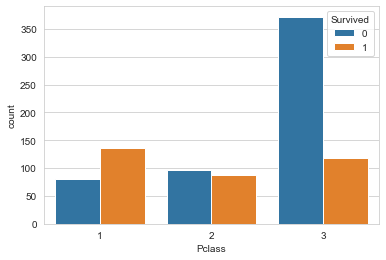

In [14]:
## Pclass vs Survived plot
sns.set_style("whitegrid")
sns.countplot(x='Pclass', hue='Survived', data = df)

This shows that, most deaths were of the people in Pclass- 3

<AxesSubplot:xlabel='Sex', ylabel='count'>

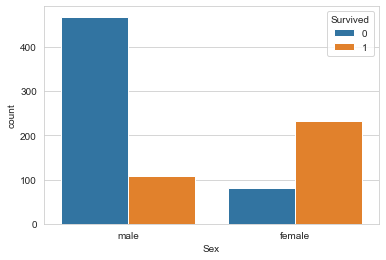

In [15]:
sns.set_style("whitegrid")
sns.countplot(x='Sex', hue='Survived', data = df)

Here, female survival is more than male. This shows that priority was set as childen, female and then male.

<AxesSubplot:xlabel='Age', ylabel='Density'>

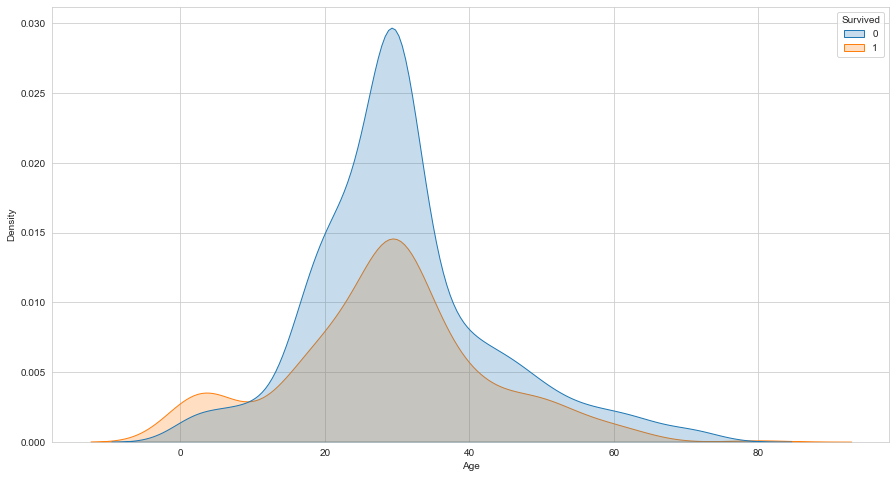

In [16]:
fig = plt.figure(figsize=(15,8),)
sns.set_style("whitegrid")
sns.kdeplot(x='Age', hue='Survived', data = df, color='gray',shade=True)

The survival with respect to age is that people mostly belong to age group between 20 to 40 and had more deaths compared to survival rate. Here, children were the priority as it has more survival rate compared to deaths.

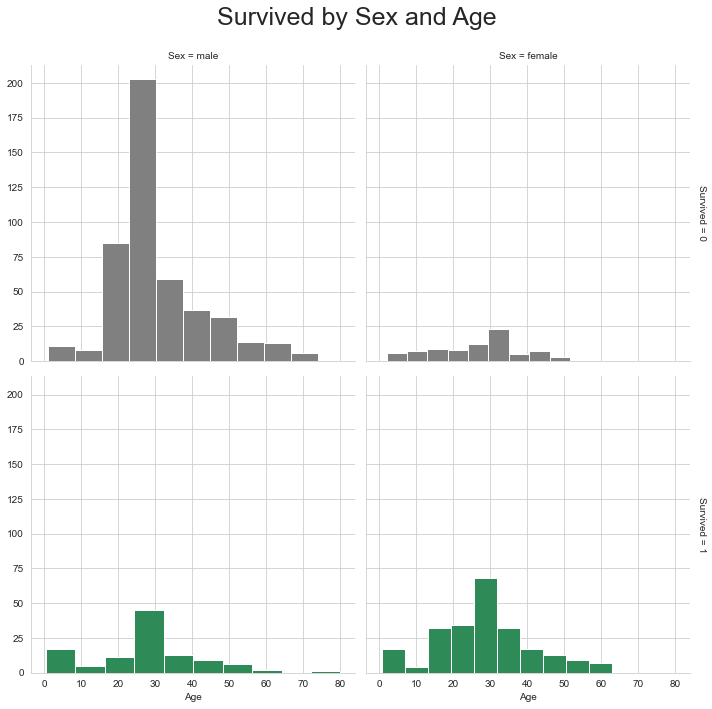

In [17]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(df,size=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

In [18]:
for i in [df]:
    i['relatives'] = i['SibSp'] + i['Parch']
    i.loc[i['relatives'] > 0, 'not_alone'] = 0
    i.loc[i['relatives'] == 0, 'not_alone'] = 1
    i['not_alone'] = i['not_alone'].astype(int)
df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

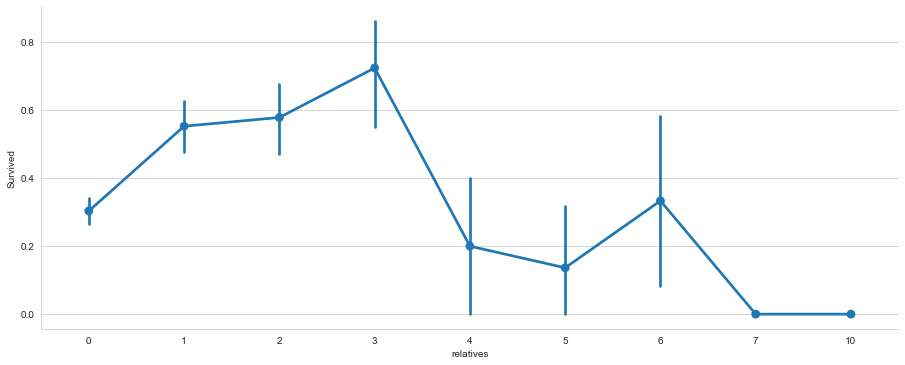

In [19]:
axes = sns.factorplot('relatives','Survived', data=df, aspect = 2.5)

People with 1 to 3 relatives will have high probability of survival.

In [20]:
X= df.drop(columns='Survived')
y= df['Survived']

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])

In [22]:
## ont hot enoding in the sex column to convert categorical into numeric
# X =pd.get_dummies(X, columns=["Sex"])
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,relatives,not_alone
0,3,1,22.0,1,0,7.2500,1,0
1,1,0,38.0,1,0,71.2833,1,0
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,1,0
4,3,1,35.0,0,0,8.0500,0,1


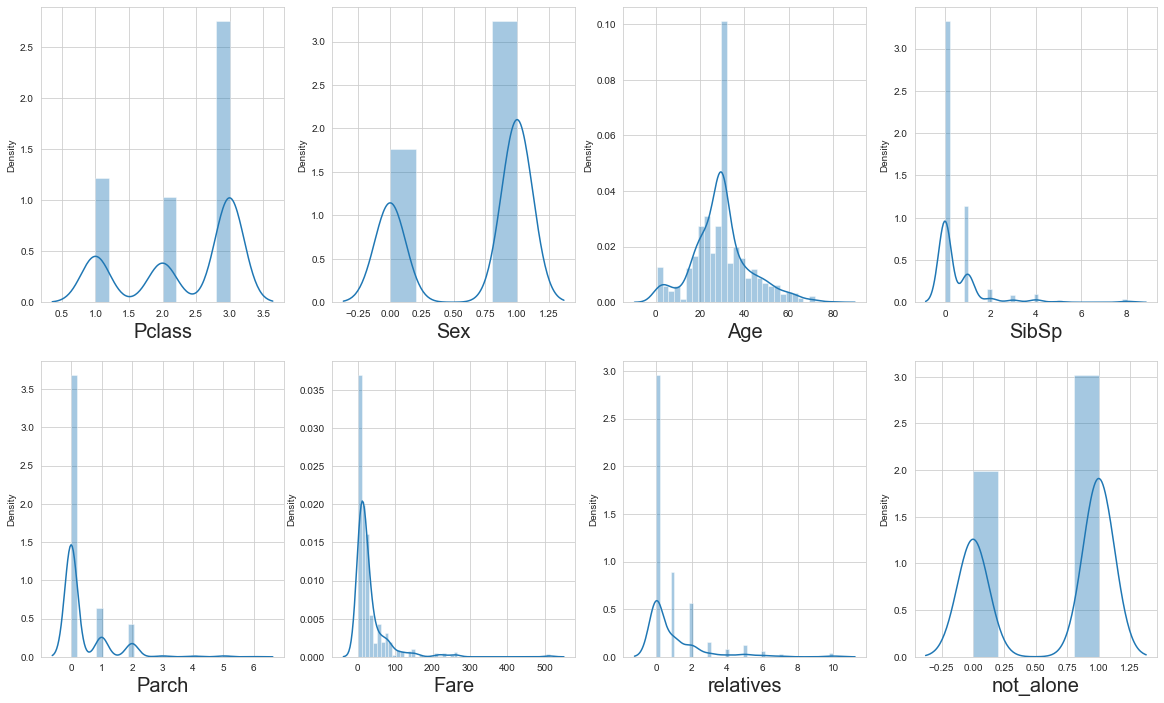

In [23]:
plt.figure(figsize=(20, 25), facecolor= 'white')
plotnumber = 1

for column in X:
    if plotnumber <=13:
        ax = plt.subplot(4,4 ,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

#### Applying decision tree classifier

In [24]:
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2)

In [26]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
clf.score(X_train,y_train)

0.9803370786516854

In [28]:
y_pred= clf.predict(X_test)

In [29]:
clf.score(X_test, y_test)

0.7821229050279329

#### Hyperparameter tuning

In [30]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
}

In [31]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [32]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [33]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 9, 'splitter': 'random'}


In [34]:
grid_search.best_score_

0.8300502314586822

In [35]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth =19, min_samples_leaf= 3, min_samples_split= 9, splitter ='random')
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=19, min_samples_leaf=3, min_samples_split=9,
                       splitter='random')

In [36]:
clf.score(X_train,y_train)

0.8553370786516854

In [37]:
clf.score(X_test,y_test)

0.7932960893854749

In [38]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_pred, y_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix:")
print(cm)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)


Confusion matrix:
[[81 16]
 [23 59]]
Classification report:
Accuracy:  0.7821229050279329
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       104
           1       0.72      0.79      0.75        75

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179

